
# Project: Investigate a Dataset No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project we will be analyzing data associated with medical appointments in Brazil. Especially we will finding trend between patients who show the appointment and who they not
>
> **Questions that exploring the project :**
> - How many appointements are missed?
> - Which gender is almost dose not show up in their appointment?
> - What kind of disease is popular among older patients?

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [57]:
# Load data to a dataframe
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv');
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


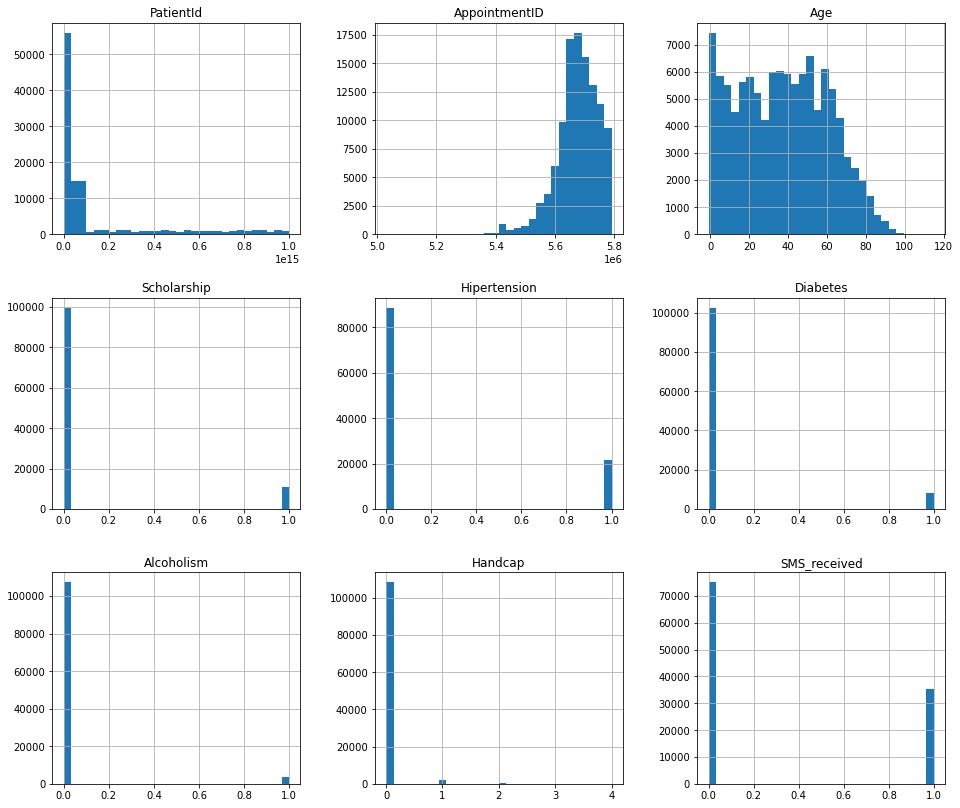

In [58]:
#Get a general look to dataframe columns
df.hist(figsize = (16,14), bins=30);


In [59]:
#Show the size of the dataset
df.shape

(110527, 14)

>  110527 rows, 14 columns

In [60]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [62]:
# Show data types of the dataset
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [63]:
# Chech if there are null values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [64]:
# Chech if there is duplicate in the dataset
df.duplicated().sum()

0

**Observation:**
> 1- There are no Null values in the dataset
>
> 2- There are no duplicated row in the dataset
>
> 3- There are 3 independent variables and 1 dndependent
>
> 4- columns names format should be corrected / unified
>
> 5- PatientId must be int
>
> 6- ScheduledDay and AppointmentDay format should be datetime


### Data Cleaning 

In [65]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [66]:
# Typos in the column names as well as their format should be corrected / unified
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [73]:
# Convert patient_id from float to int
df['patient_id'] = df['patient_id'].astype('int64')

df.dtypes

patient_id          int64
appointment_id      int64
gender             object
scheduled_day      object
appointment_day    object
age                 int64
neighbourhood      object
scholarship         int64
hypertension        int64
diabetes            int64
alcoholism          int64
handicap            int64
sms_received        int64
no_show            object
dtype: object

In [74]:
# Check if there is duplicated after convert Convert patient_id
df.duplicated().sum()

0

In [75]:
# Convert scheduled_day and  appointment_day types
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')

df.dtypes

patient_id                  int64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

In [77]:
# In this step I will drop all columns that I'm not going to use.
df.drop(['patient_id', 'appointment_id', 'scheduled_day', 'appointment_day', 'neighbourhood', 'scholarship'], axis=1, inplace=True)

In [78]:
df.head()

,gender,age,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,1,0,0,0,0,No
1,M,56,0,0,0,0,0,No
2,F,62,0,0,0,0,0,No
3,F,8,0,0,0,0,0,No
4,F,56,1,1,0,0,0,No


In [79]:
df.dtypes

gender          object
age              int64
hypertension     int64
diabetes         int64
alcoholism       int64
handicap         int64
sms_received     int64
no_show         object
dtype: object

In [80]:
# gender unique values
df.gender.unique()

array(['F', 'M'], dtype=object)

In [81]:
# age unique values
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [82]:
# hypertension unique values
df.hypertension.unique()

array([1, 0], dtype=int64)

In [83]:
# hypertension unique values
df.diabetes.unique()

array([0, 1], dtype=int64)

In [84]:
# hypertension unique values
df.alcoholism.unique()

array([0, 1], dtype=int64)

In [85]:
# handicap unique values
df.handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [86]:
# sms_received unique values
df.sms_received.unique()

array([0, 1], dtype=int64)

In [87]:
# no_show unique values
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

**Observation:**
> After Cleaning
>
> 1 -The dataset is Clear
>
> 1- The dataset not contain null values
>
> 2- The dataset not contain duplicated rows
>
> 3- I desided to drop coulnms that I'm not going to use them in my analysis
>
> 4- columns names format are unifyed

<a id='eda'></a>
## Exploratory Data Analysis

### Which gender is almost dose not show up in their appointment?

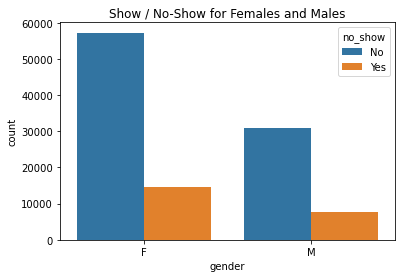

In [89]:
# Create data frames for who show up thier appointment and dose not show
Show_appointments = df[df['no_show'] == 'No']
NoShow_appointments = df[df['no_show'] == 'Yes']

# Calculate the total number of female ana male appointments
all_female_appointments = len(df.query('gender == "F"'))
all_male_appointments = len(df.query('gender == "M"'))

# Calculate how many number of female ana male do not show up thier appointments
NoShow_appointments_male = len(NoShow_appointments.query('gender == "M"'))

NoShow_appointments_female = len(NoShow_appointments.query('gender == "F"'))

# Calculare rtio
NoShow_female_ratio = int(round(NoShow_appointments_female/all_female_appointments * 100))

NoShow_male_ratio = int(round(NoShow_appointments_male/all_male_appointments * 100))


ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['F', 'M']


> There is 71840 appointments made by female, 20% of them registerd as not show up
>
> There is 38687 appointments made by male, 20% of them registerd as not show up

### How many appointements are missed?

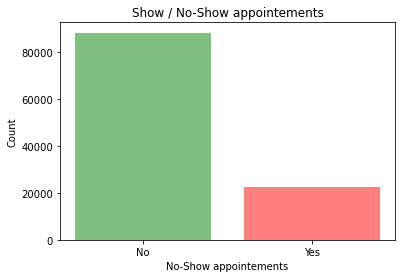

In [90]:
# I'll use the frameset in previous cell


Show = len(Show_appointments)
No_show = len(NoShow_appointments)
No_show_ratio = round (No_show/len(df) * 100)

labels=['No', 'Yes']
y_pos = np.arange(len(labels))
count = [Show,No_show]
color = ['Green', 'Red']

plt.bar(y_pos, count, align='center', color = color, alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Count')
plt.xlabel('No-Show appointements')
plt.title('Show / No-Show appointements')

plt.show()


> It's about 20% of the appointements are did not show


### What kind of disease is popular among older patients?

In [91]:
# Defind function to calulate the ratio of each disease for range of age 
# The function take two arguments (from_age, to_age) of the rang
def CalculateRation(from_age, to_age):
    '''Takes two arguments, and return rtio of each disease'''
    age_df = df.query('age >=' + from_age +' and age <='+ to_age)
    deses_ratio = age_df[['hypertension', 'diabetes', 'alcoholism', 'handicap']].mean()*100
    deses_ratio.plot(kind = 'pie', title = "The ratio of each disease from " + from_age + " - " + to_age + " old", ylabel = "")
    return deses_ratio

hypertension    54.848156
diabetes        21.824966
alcoholism       3.660322
handicap         4.349880
dtype: float64

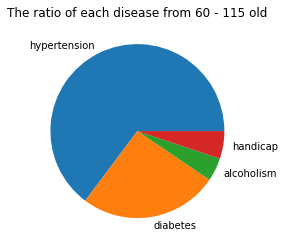

In [92]:
# Get the ratio of popular disease in older patient
# The older patient from 60 old and above
CalculateRation('60' , '115')

The visualization above show that hypertension is the most populare disease among older patient.

<a id='conclusions'></a>
## Conclusions

>Medical Appointment No Shows dataset was contains more than 100k rows. After wrangling, it has been decided to remove all columns that not going to use in analysis and unifying columns names. 
>
>for visualization, I use histogram, bar and pie chart. The histogram was used to get an overview about the dataset. And the bar chart I use it twice first to detrmine the ratio of missed appoinpments for each gender and to find how mane appoinpments are missed. The pie chart to know what the popular disease among older patient.
>
>As a result for this analysis:
>
> - 20% of the appointements are did not show.
> - There is 71840 appointments made by female, 20% of them registerd as not show up. 
> - There is 38687 appointments made by male, 20% of them registerd as not show up
> - hypertension is the most populare disease among older patient.
>
> Limitation
> - There are far more females to males in the dataset so this is not an accurate picture of gender no shows.
> - The statistic used here are exploratory analysis, many potential correlations may remain uncovered. 